In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests
from wordcloud import WordCloud, STOPWORDS
import os
from PIL import Image
import numpy as np
import re

from textblob import TextBlob

import sys
import matplotlib.pyplot as plt
import pandas as pd

import nltk
import pycountry
from nltk.stem import SnowballStemmer

from langdetect import detect

from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud, STOPWORDS
import os
from PIL import Image

import numpy as np

from sklearn.feature_extraction.text import CountVectorizer


In [19]:
# Request for foursquare and checking status code   
url = "https://tr.foursquare.com/v/bacchanal-buffet/504e861fe4b06a59881632b0?tipsPage=1"
response = requests.get(url)
response.status_code

200

In [20]:
#Connecting with Beautiful Soap for bacchanal buffet
page = response.text
soup = BeautifulSoup(page, "lxml")
#soup.prettify()

In [23]:
review_list = []

i = 1
while i < 10:
    url_list = "https://tr.foursquare.com/v/bacchanal-buffet/504e861fe4b06a59881632b0?tipsPage="+str(i)
    #print(url_list)
    response = requests.get(url_list)
    #print(response.status_code)
    page = response.text
    #print(page)
    soup = BeautifulSoup(page,"lxml")
    #print(soup.prettify)
    rows = soup.find_all('div', {'class': 'tipContents'})
    #print(rows)
    for row in rows:
        cells = row.find_all('div', {'class': 'tipText'})
        #print(cells)
        cells_to_string = str(cells)
        cells_sub = (re.sub(re.compile('<.*?>'),'',cells_to_string))
        #print(cells_sub)
        review_list.append(cells_sub)
    result = pd.DataFrame(review_list)
    i += 1

In [24]:
result

,0
0,"[Resimde göründüğü gibi.!'.,!'.,!']"
1,[Yok boyle bisey]
2,"[Amazing! Do you want Italian food, Asian food..."
3,"[Come prepared to grub!! Perfect portions, cle..."
4,[The smoked bacon!! OMG the smoked bacon! =) D...
...,...
404,[Don't waste your money on this buffet. Way ov...
405,[あの待ち時間と値段でこのクオリティ…正直ガッカリ😞]
406,[Las Mimosas y los Tacos son riquisimos]
407,[Esta mejor el buffet del Wynn o del Bellagio ...


In [25]:
len(result)

409

In [26]:
result.head(10)

,0
0,"[Resimde göründüğü gibi.!'.,!'.,!']"
1,[Yok boyle bisey]
2,"[Amazing! Do you want Italian food, Asian food..."
3,"[Come prepared to grub!! Perfect portions, cle..."
4,[The smoked bacon!! OMG the smoked bacon! =) D...
5,[What's not to like about this buffet?? This w...
6,"[Lot of choice, but it is all the best of the ..."
7,[Went for the champagne brunch. Excellent vari...
8,[Amazing place. HUGE range and the price is wo...
9,[I really enjoyed the duck. It was cooked to a...


In [27]:
# Split each row to cells with ","

result_split1 = result[0].str.split('[',expand=True)
result_split2 = result_split1[1].str.split(']',expand=True)
result_split3 = result_split2[0]
result = pd.DataFrame(result_split3)

In [29]:
reviewlist = pd.DataFrame(result)

In [30]:
reviewlist

,0
0,"Resimde göründüğü gibi.!'.,!'.,!'"
1,Yok boyle bisey
2,"Amazing! Do you want Italian food, Asian food,..."
3,"Come prepared to grub!! Perfect portions, clea..."
4,The smoked bacon!! OMG the smoked bacon! =) Du...
...,...
404,Don't waste your money on this buffet. Way ove...
405,あの待ち時間と値段でこのクオリティ…正直ガッカリ😞
406,Las Mimosas y los Tacos son riquisimos
407,Esta mejor el buffet del Wynn o del Bellagio y...


In [33]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
import re
import string

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
new_line = lambda x: re.sub('\n',' ',x)

reviewlist['text'] = reviewlist[0].map(alphanumeric).map(punc_lower).map(new_line)
reviewlist.head()

,0,text
0,"Resimde göründüğü gibi.!'.,!'.,!'",resimde göründüğü gibi
1,Yok boyle bisey,yok boyle bisey
2,"Amazing! Do you want Italian food, Asian food,...",amazing do you want italian food asian food ...
3,"Come prepared to grub!! Perfect portions, clea...",come prepared to grub perfect portions clea...
4,The smoked bacon!! OMG the smoked bacon! =) Du...,the smoked bacon omg the smoked bacon du...


In [34]:
#reviewlist = reviewlist["text"]
reviewlist = pd.DataFrame(reviewlist)

In [35]:
reviewlist[['polarity', 'subjectivity']] = reviewlist['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [36]:
reviewlist

,0,text,polarity,subjectivity
0,"Resimde göründüğü gibi.!'.,!'.,!'",resimde göründüğü gibi,0.000000,0.000000
1,Yok boyle bisey,yok boyle bisey,0.000000,0.000000
2,"Amazing! Do you want Italian food, Asian food,...",amazing do you want italian food asian food ...,0.220000,0.280000
3,"Come prepared to grub!! Perfect portions, clea...",come prepared to grub perfect portions clea...,0.501587,0.596825
4,The smoked bacon!! OMG the smoked bacon! =) Du...,the smoked bacon omg the smoked bacon du...,0.333333,0.333333
...,...,...,...,...
404,Don't waste your money on this buffet. Way ove...,don t waste your money on this buffet way ove...,-0.200000,0.000000
405,あの待ち時間と値段でこのクオリティ…正直ガッカリ😞,あの待ち時間と値段でこのクオリティ…正直ガッカリ😞,0.000000,0.000000
406,Las Mimosas y los Tacos son riquisimos,las mimosas y los tacos son riquisimos,0.000000,0.000000
407,Esta mejor el buffet del Wynn o del Bellagio y...,esta mejor el buffet del wynn o del bellagio y...,0.000000,0.000000


In [37]:
for index, row in reviewlist['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        reviewlist.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        reviewlist.loc[index, 'sentiment'] = "positive"
    else:
        reviewlist.loc[index, 'sentiment'] = "neutral"
    reviewlist.loc[index, 'neg'] = neg
    reviewlist.loc[index, 'neu'] = neu
    reviewlist.loc[index, 'pos'] = pos
    reviewlist.loc[index, 'compound'] = comp

In [38]:
reviews = reviewlist[reviewlist["compound"]!=0]

In [43]:
reviews.sort_values("pos", ascending=False).sample(5)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
365,Sucked. You spend tons of money and wait in li...,sucked you spend tons of money and wait in li...,-0.2450,0.700000,positive,0.081,0.833,0.086,0.0516
375,This place is amazing.,this place is amazing,0.6000,0.900000,positive,0.000,0.441,0.559,0.5859
125,Best buffet BY FAR!. It serves from pizza to s...,best buffet by far it serves from pizza to s...,0.5500,0.650000,positive,0.000,0.741,0.259,0.6369
9,I really enjoyed the duck. It was cooked to a ...,i really enjoyed the duck it was cooked to a ...,0.4625,0.616667,positive,0.000,0.814,0.186,0.8070
83,"I came here for breackfast/brunch, and it was ...",i came here for breackfast brunch and it was ...,0.2500,0.333333,positive,0.000,0.789,0.211,0.5859


In [44]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [45]:
count_values_in_column(reviews,"sentiment")

,Total,Percentage
positive,262,85.06
negative,46,14.94


In [46]:
reviews.sort_values("neg", ascending=False).head(5)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
399,Don't go disappointing.,don t go disappointing,-0.600000,0.700000,negative,0.615,0.385,0.000,-0.4939
394,"A little overrated. It's ok. No more, no less.",a little overrated it s ok no more no less,0.036458,0.391667,negative,0.388,0.441,0.171,-0.3535
398,Over rated! Crazy unorganized experience. Very...,over rated crazy unorganized experience very...,0.033333,0.566667,negative,0.364,0.486,0.150,-0.5468
306,Died and went to buffet heaven!,died and went to buffet heaven,0.000000,0.000000,negative,0.330,0.367,0.303,-0.0772
319,Como si no hubiera un mañana!,como si no hubiera un mañana,0.000000,0.000000,negative,0.306,0.694,0.000,-0.2960


In [48]:
reviews.sort_values("pos", ascending=False).head(5)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
357,Best Buffet,best buffet,1.0,0.300,positive,0.0,0.192,0.808,0.6369
371,Absolutely amazing.,absolutely amazing,0.6,0.900,positive,0.0,0.196,0.804,0.6240
364,Excellent buffet,excellent buffet,1.0,1.000,positive,0.0,0.213,0.787,0.5719
339,Excellent à faire,excellent à faire,1.0,1.000,positive,0.0,0.213,0.787,0.5719
265,This place is top notch... LOVE LOVE LOVE....,this place is top notch love love love,0.5,0.575,positive,0.0,0.217,0.783,0.9371


In [49]:
reviews.mean()

polarity        0.388765
subjectivity    0.527580
neg             0.049224
neu             0.643260
pos             0.307529
compound        0.470715
dtype: float64

In [50]:
reviews.groupby("sentiment").mean()

,polarity,subjectivity,neg,neu,pos,compound
sentiment,,,,,,
negative,-0.045966,0.401515,0.202761,0.742870,0.054370,-0.372828
positive,0.465092,0.549714,0.022267,0.625771,0.351977,0.618818


In [58]:
reviews.sentiment.value_counts(normalize=False)

positive    262
negative     46
Name: sentiment, dtype: int64

In [52]:
def create_wordcloud(text):
    mask = np.array(Image.open("/Users/yalinyener/GitHub/yalinyener/YelpNLP/cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=25000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


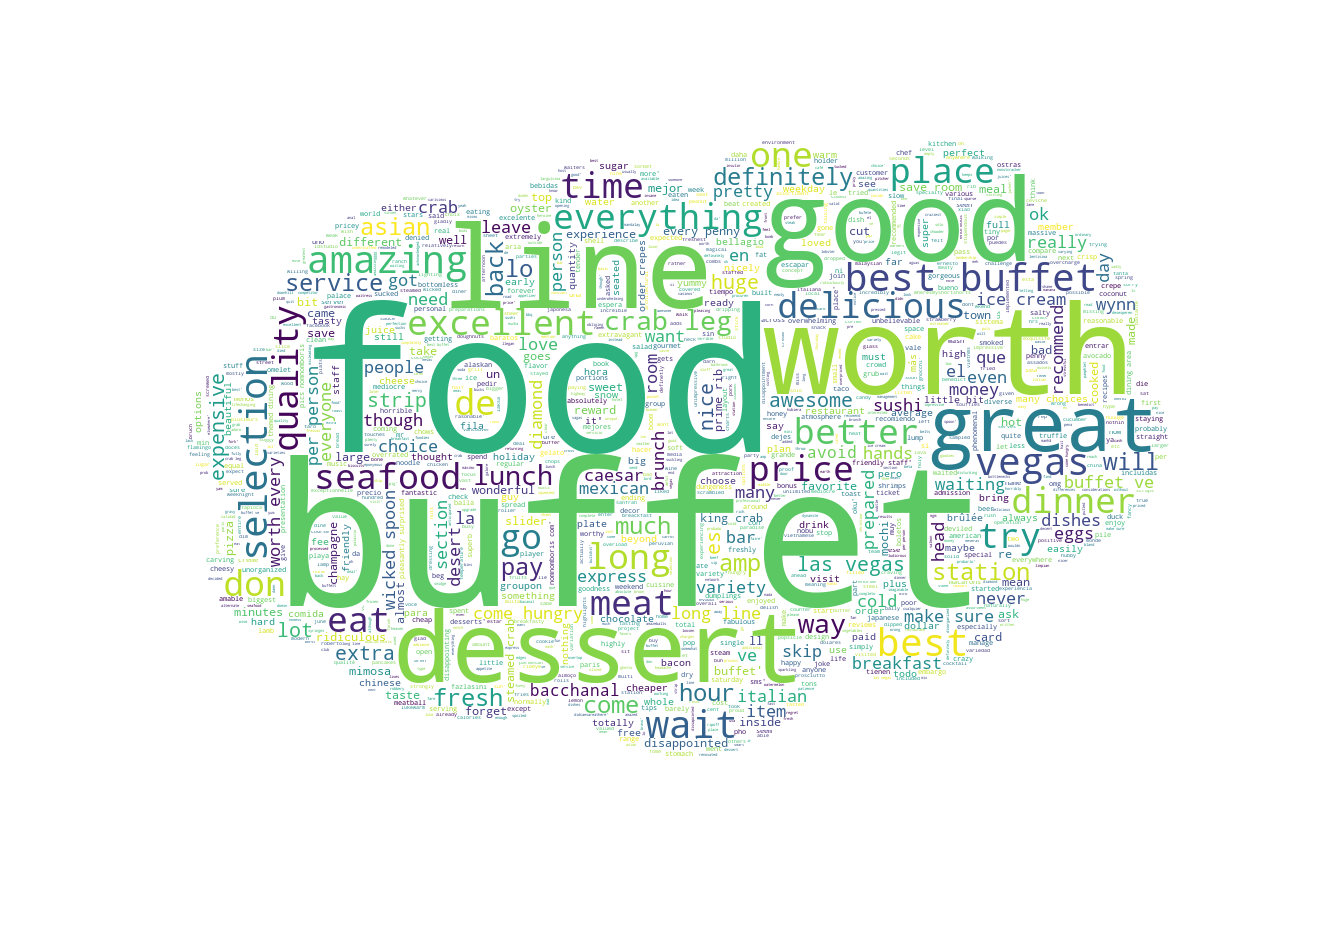

In [53]:
create_wordcloud(reviews["text"].values)

In [54]:
negative_values = reviews[reviews["sentiment"]=="negative"]
negative_values = negative_values["text"].values

In [55]:
positive_values = reviews[reviews["sentiment"]=="positive"]
positive_values = positive_values["text"].values

Word Cloud Saved Successfully


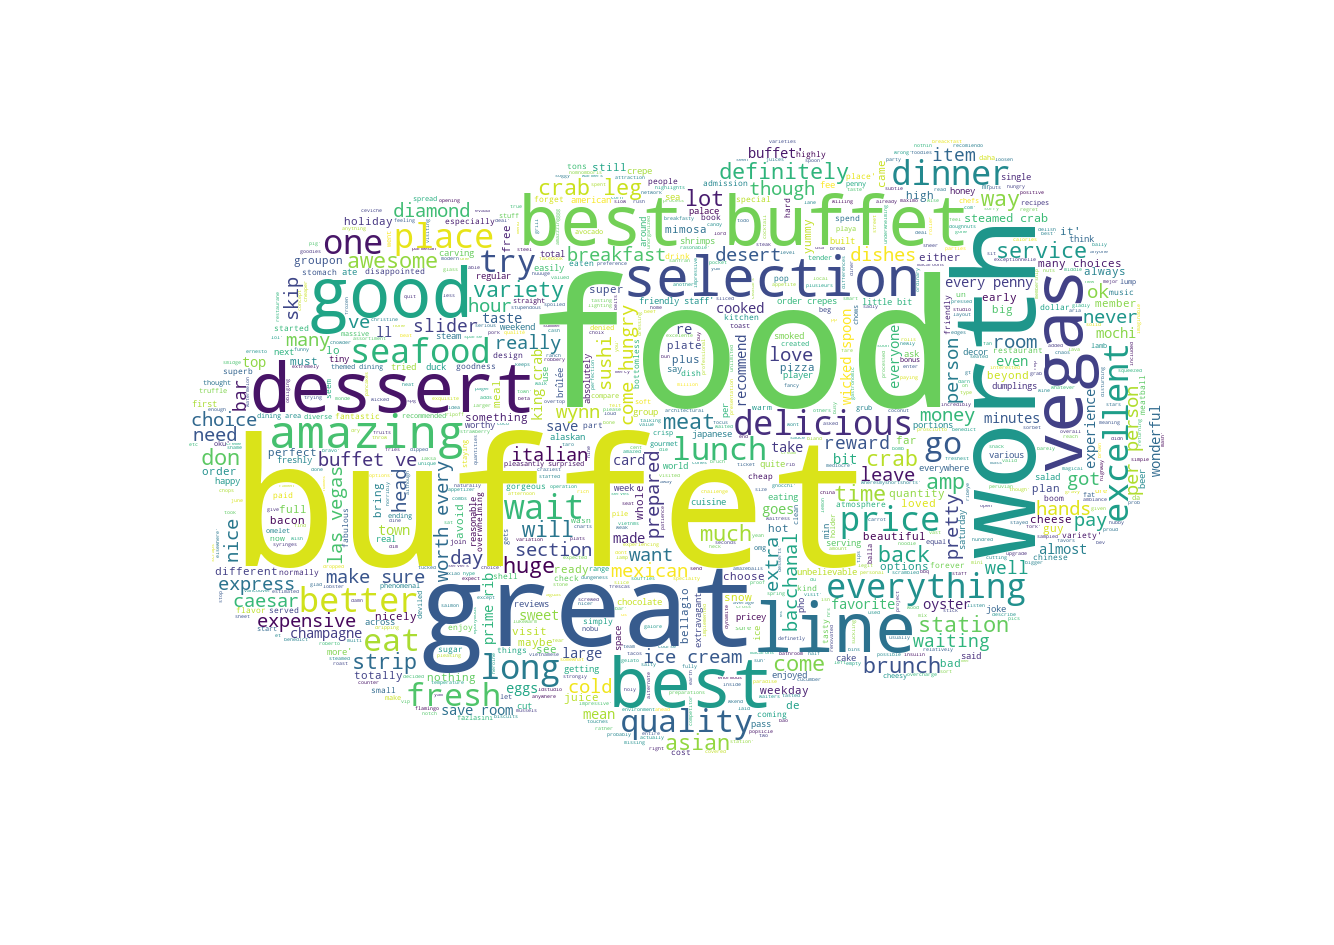

In [57]:
create_wordcloud(positive_values)

In [59]:
reviews

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
2,"Amazing! Do you want Italian food, Asian food,...",amazing do you want italian food asian food ...,0.220000,0.280000,positive,0.000,0.863,0.137,0.6249
3,"Come prepared to grub!! Perfect portions, clea...",come prepared to grub perfect portions clea...,0.501587,0.596825,positive,0.049,0.517,0.434,0.9442
4,The smoked bacon!! OMG the smoked bacon! =) Du...,the smoked bacon omg the smoked bacon du...,0.333333,0.333333,positive,0.035,0.737,0.228,0.8419
5,What's not to like about this buffet?? This wa...,what s not to like about this buffet this wa...,0.416667,0.500000,positive,0.047,0.697,0.256,0.7842
6,"Lot of choice, but it is all the best of the b...",lot of choice but it is all the best of the b...,0.833333,0.366667,positive,0.027,0.626,0.347,0.9538
...,...,...,...,...,...,...,...,...,...
399,Don't go disappointing.,don t go disappointing,-0.600000,0.700000,negative,0.615,0.385,0.000,-0.4939
400,Ridiculous wait times for mediocre food. Go to...,ridiculous wait times for mediocre food go to...,-0.416667,1.000000,negative,0.217,0.783,0.000,-0.3612
403,Will never go back! Disappointing!,will never go back disappointing,-0.300000,0.350000,positive,0.000,0.604,0.396,0.3875
404,Don't waste your money on this buffet. Way ove...,don t waste your money on this buffet way ove...,-0.200000,0.000000,negative,0.237,0.763,0.000,-0.4215


In [60]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [61]:
clean = reviews

In [62]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

clean['Tweet_punct'] = reviews['text'].apply(lambda x: remove_punct(x))
clean.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,Tweet_punct
2,"Amazing! Do you want Italian food, Asian food,...",amazing do you want italian food asian food ...,0.220000,0.280000,positive,0.000,0.863,0.137,0.6249,amazing do you want italian food asian food ...
3,"Come prepared to grub!! Perfect portions, clea...",come prepared to grub perfect portions clea...,0.501587,0.596825,positive,0.049,0.517,0.434,0.9442,come prepared to grub perfect portions clea...
4,The smoked bacon!! OMG the smoked bacon! =) Du...,the smoked bacon omg the smoked bacon du...,0.333333,0.333333,positive,0.035,0.737,0.228,0.8419,the smoked bacon omg the smoked bacon du...
5,What's not to like about this buffet?? This wa...,what s not to like about this buffet this wa...,0.416667,0.500000,positive,0.047,0.697,0.256,0.7842,what s not to like about this buffet this wa...
6,"Lot of choice, but it is all the best of the b...",lot of choice but it is all the best of the b...,0.833333,0.366667,positive,0.027,0.626,0.347,0.9538,lot of choice but it is all the best of the b...
7,Went for the champagne brunch. Excellent varie...,went for the champagne brunch excellent varie...,0.475000,0.495833,positive,0.000,0.712,0.288,0.8834,went for the champagne brunch excellent varie...
8,Amazing place. HUGE range and the price is wor...,amazing place huge range and the price is wor...,0.433333,0.633333,positive,0.000,0.708,0.292,0.8360,amazing place huge range and the price is wor...
9,I really enjoyed the duck. It was cooked to a ...,i really enjoyed the duck it was cooked to a ...,0.462500,0.616667,positive,0.000,0.814,0.186,0.8070,i really enjoyed the duck it was cooked to a ...
10,Awesome weekday breakfast buffet! We were plea...,awesome weekday breakfast buffet we were plea...,0.460000,0.700000,positive,0.000,0.587,0.413,0.9382,awesome weekday breakfast buffet we were plea...
11,"In Vegas, not all buffets are created equal. H...",in vegas not all buffets are created equal h...,-0.035000,0.547500,positive,0.068,0.831,0.101,0.0772,in vegas not all buffets are created equal h...


In [66]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

clean['Tweet_tokenized'] = clean['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
clean.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,Tweet_punct,Tweet_tokenized
2,"Amazing! Do you want Italian food, Asian food,...",amazing do you want italian food asian food ...,0.220000,0.280000,positive,0.000,0.863,0.137,0.6249,amazing do you want italian food asian food ...,"[amazing, do, you, want, italian, food, asian,..."
3,"Come prepared to grub!! Perfect portions, clea...",come prepared to grub perfect portions clea...,0.501587,0.596825,positive,0.049,0.517,0.434,0.9442,come prepared to grub perfect portions clea...,"[come, prepared, to, grub, perfect, portions, ..."
4,The smoked bacon!! OMG the smoked bacon! =) Du...,the smoked bacon omg the smoked bacon du...,0.333333,0.333333,positive,0.035,0.737,0.228,0.8419,the smoked bacon omg the smoked bacon du...,"[the, smoked, bacon, omg, the, smoked, bacon, ..."
5,What's not to like about this buffet?? This wa...,what s not to like about this buffet this wa...,0.416667,0.500000,positive,0.047,0.697,0.256,0.7842,what s not to like about this buffet this wa...,"[what, s, not, to, like, about, this, buffet, ..."
6,"Lot of choice, but it is all the best of the b...",lot of choice but it is all the best of the b...,0.833333,0.366667,positive,0.027,0.626,0.347,0.9538,lot of choice but it is all the best of the b...,"[lot, of, choice, but, it, is, all, the, best,..."


In [67]:
stopword = nltk.corpus.stopwords.words('english')

In [68]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
clean['Tweet_nonstop'] = clean['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
clean.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,Tweet_punct,Tweet_tokenized,Tweet_nonstop
2,"Amazing! Do you want Italian food, Asian food,...",amazing do you want italian food asian food ...,0.220000,0.280000,positive,0.000,0.863,0.137,0.6249,amazing do you want italian food asian food ...,"[amazing, do, you, want, italian, food, asian,...","[amazing, want, italian, food, asian, food, me..."
3,"Come prepared to grub!! Perfect portions, clea...",come prepared to grub perfect portions clea...,0.501587,0.596825,positive,0.049,0.517,0.434,0.9442,come prepared to grub perfect portions clea...,"[come, prepared, to, grub, perfect, portions, ...","[come, prepared, grub, perfect, portions, clea..."
4,The smoked bacon!! OMG the smoked bacon! =) Du...,the smoked bacon omg the smoked bacon du...,0.333333,0.333333,positive,0.035,0.737,0.228,0.8419,the smoked bacon omg the smoked bacon du...,"[the, smoked, bacon, omg, the, smoked, bacon, ...","[smoked, bacon, omg, smoked, bacon, dumplings,..."
5,What's not to like about this buffet?? This wa...,what s not to like about this buffet this wa...,0.416667,0.500000,positive,0.047,0.697,0.256,0.7842,what s not to like about this buffet this wa...,"[what, s, not, to, like, about, this, buffet, ...","[like, buffet, awesome, bit, pricey, definitel..."
6,"Lot of choice, but it is all the best of the b...",lot of choice but it is all the best of the b...,0.833333,0.366667,positive,0.027,0.626,0.347,0.9538,lot of choice but it is all the best of the b...,"[lot, of, choice, but, it, is, all, the, best,...","[lot, choice, best, best, dinner, recommended,..."
7,Went for the champagne brunch. Excellent varie...,went for the champagne brunch excellent varie...,0.475000,0.495833,positive,0.000,0.712,0.288,0.8834,went for the champagne brunch excellent varie...,"[went, for, the, champagne, brunch, excellent,...","[went, champagne, brunch, excellent, variety, ..."
8,Amazing place. HUGE range and the price is wor...,amazing place huge range and the price is wor...,0.433333,0.633333,positive,0.000,0.708,0.292,0.8360,amazing place huge range and the price is wor...,"[amazing, place, huge, range, and, the, price,...","[amazing, place, huge, range, price, worth, cu..."
9,I really enjoyed the duck. It was cooked to a ...,i really enjoyed the duck it was cooked to a ...,0.462500,0.616667,positive,0.000,0.814,0.186,0.8070,i really enjoyed the duck it was cooked to a ...,"[i, really, enjoyed, the, duck, it, was, cooke...","[really, enjoyed, duck, cooked, perfect, crisp..."
10,Awesome weekday breakfast buffet! We were plea...,awesome weekday breakfast buffet we were plea...,0.460000,0.700000,positive,0.000,0.587,0.413,0.9382,awesome weekday breakfast buffet we were plea...,"[awesome, weekday, breakfast, buffet, we, were...","[awesome, weekday, breakfast, buffet, pleasant..."
11,"In Vegas, not all buffets are created equal. H...",in vegas not all buffets are created equal h...,-0.035000,0.547500,positive,0.068,0.831,0.101,0.0772,in vegas not all buffets are created equal h...,"[in, vegas, not, all, buffets, are, created, e...","[vegas, buffets, created, equal, head, straigh..."


In [69]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

clean['Tweet_stemmed'] = clean['Tweet_nonstop'].apply(lambda x: stemming(x))
clean.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
2,"Amazing! Do you want Italian food, Asian food,...",amazing do you want italian food asian food ...,0.220000,0.280000,positive,0.000,0.863,0.137,0.6249,amazing do you want italian food asian food ...,"[amazing, do, you, want, italian, food, asian,...","[amazing, want, italian, food, asian, food, me...","[amaz, want, italian, food, asian, food, mexic..."
3,"Come prepared to grub!! Perfect portions, clea...",come prepared to grub perfect portions clea...,0.501587,0.596825,positive,0.049,0.517,0.434,0.9442,come prepared to grub perfect portions clea...,"[come, prepared, to, grub, perfect, portions, ...","[come, prepared, grub, perfect, portions, clea...","[come, prepar, grub, perfect, portion, clean, ..."
4,The smoked bacon!! OMG the smoked bacon! =) Du...,the smoked bacon omg the smoked bacon du...,0.333333,0.333333,positive,0.035,0.737,0.228,0.8419,the smoked bacon omg the smoked bacon du...,"[the, smoked, bacon, omg, the, smoked, bacon, ...","[smoked, bacon, omg, smoked, bacon, dumplings,...","[smoke, bacon, omg, smoke, bacon, dumpl, sushi..."
5,What's not to like about this buffet?? This wa...,what s not to like about this buffet this wa...,0.416667,0.500000,positive,0.047,0.697,0.256,0.7842,what s not to like about this buffet this wa...,"[what, s, not, to, like, about, this, buffet, ...","[like, buffet, awesome, bit, pricey, definitel...","[like, buffet, awesom, bit, pricey, definit, w..."
6,"Lot of choice, but it is all the best of the b...",lot of choice but it is all the best of the b...,0.833333,0.366667,positive,0.027,0.626,0.347,0.9538,lot of choice but it is all the best of the b...,"[lot, of, choice, but, it, is, all, the, best,...","[lot, choice, best, best, dinner, recommended,...","[lot, choic, best, best, dinner, recommend, ar..."


In [108]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yalinyener/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [70]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

clean['Tweet_lemmatized'] = clean['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
clean.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
2,"Amazing! Do you want Italian food, Asian food,...",amazing do you want italian food asian food ...,0.220000,0.280000,positive,0.000,0.863,0.137,0.6249,amazing do you want italian food asian food ...,"[amazing, do, you, want, italian, food, asian,...","[amazing, want, italian, food, asian, food, me...","[amaz, want, italian, food, asian, food, mexic...","[amazing, want, italian, food, asian, food, me..."
3,"Come prepared to grub!! Perfect portions, clea...",come prepared to grub perfect portions clea...,0.501587,0.596825,positive,0.049,0.517,0.434,0.9442,come prepared to grub perfect portions clea...,"[come, prepared, to, grub, perfect, portions, ...","[come, prepared, grub, perfect, portions, clea...","[come, prepar, grub, perfect, portion, clean, ...","[come, prepared, grub, perfect, portion, clean..."
4,The smoked bacon!! OMG the smoked bacon! =) Du...,the smoked bacon omg the smoked bacon du...,0.333333,0.333333,positive,0.035,0.737,0.228,0.8419,the smoked bacon omg the smoked bacon du...,"[the, smoked, bacon, omg, the, smoked, bacon, ...","[smoked, bacon, omg, smoked, bacon, dumplings,...","[smoke, bacon, omg, smoke, bacon, dumpl, sushi...","[smoked, bacon, omg, smoked, bacon, dumpling, ..."
5,What's not to like about this buffet?? This wa...,what s not to like about this buffet this wa...,0.416667,0.500000,positive,0.047,0.697,0.256,0.7842,what s not to like about this buffet this wa...,"[what, s, not, to, like, about, this, buffet, ...","[like, buffet, awesome, bit, pricey, definitel...","[like, buffet, awesom, bit, pricey, definit, w...","[like, buffet, awesome, bit, pricey, definitel..."
6,"Lot of choice, but it is all the best of the b...",lot of choice but it is all the best of the b...,0.833333,0.366667,positive,0.027,0.626,0.347,0.9538,lot of choice but it is all the best of the b...,"[lot, of, choice, but, it, is, all, the, best,...","[lot, choice, best, best, dinner, recommended,...","[lot, choic, best, best, dinner, recommend, ar...","[lot, choice, best, best, dinner, recommended,..."


In [71]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [73]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(clean['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
print(countVectorizer.get_feature_names())

308 Number of reviews has 1026 words
['', 'abl', 'absolut', 'acknowledg', 'across', 'actual', 'ad', 'add', 'addit', 'admiss', 'adoro', 'afternoon', 'agua', 'ahead', 'alaskan', 'almost', 'almoço', 'alreadi', 'also', 'altern', 'although', 'alway', 'amabl', 'amaz', 'amazebal', 'amazzzingggg', 'ambianc', 'american', 'amount', 'amp', 'anal', 'anoth', 'anticip', 'anyon', 'anyth', 'anywher', 'appet', 'appetit', 'architectur', 'area', 'aria', 'around', 'asian', 'ask', 'assado', 'assort', 'assorti', 'ate', 'atmospher', 'attract', 'avail', 'averag', 'avocado', 'avoid', 'aw', 'away', 'awesom', 'bacan', 'bacchan', 'back', 'bacon', 'bad', 'balla', 'balli', 'bao', 'bar', 'barato', 'bare', 'basic', 'bastant', 'bathroom', 'bbq', 'beat', 'beauti', 'bebida', 'beef', 'beer', 'beg', 'bellagio', 'belt', 'benedict', 'best', 'beta', 'better', 'bev', 'beyond', 'big', 'bigger', 'biggest', 'bin', 'biscuit', 'bit', 'bland', 'boleto', 'bomb', 'bone', 'bonu', 'book', 'boom', 'bottleneck', 'bottomless', 'bravo', 'b

In [74]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,abl,absolut,acknowledg,across,actual,ad,add,addit,admiss,...,wrong,www,wynn,xiao,ya,yam,yeah,yum,yummi,à
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
count = pd.DataFrame(count_vect_df.sum())

In [76]:
count.sort_values(0,ascending=False).head(20)

,0
,248
buffet,127
food,93
best,69
worth,46
line,44
good,43
dessert,39
vega,38
great,37


In [77]:
reviews['text_len'] = reviews['text'].astype(str).apply(len)
reviews['text_word_count'] = reviews['text'].apply(lambda x: len(str(x).split()))
reviews.mean()

polarity            0.388765
subjectivity        0.527580
neg                 0.049224
neu                 0.643260
pos                 0.307529
compound            0.470715
text_len           97.035714
text_word_count    17.564935
dtype: float64

In [81]:
round(pd.DataFrame(reviews.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,21.33
positive,16.90


In [84]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [86]:
review_negative = reviews[reviews["sentiment"]=="negative"]
review_positive = reviews[reviews["sentiment"]=="positive"]

n2_bigrams_negative = get_top_n_gram(review_negative['text'],(2,2),20)
n2_bigrams_positive = get_top_n_gram(review_positive['text'],(2,2),20)

n3_bigrams_negative = get_top_n_gram(review_negative['text'],(3,3),20)
n3_bigrams_positive = get_top_n_gram(review_positive['text'],(3,3),20)

In [93]:
n2_bigrams_negative

[('las vegas', 4),
 ('los más', 2),
 ('en el', 2),
 ('una hora', 2),
 ('el mejor', 2),
 ('wicked spoon', 2),
 ('crab legs', 2),
 ('come hours', 2),
 ('avoid long', 2),
 ('long wait', 2),
 ('come hungry', 2),
 ('hungry don', 2),
 ('long lines', 2),
 ('asian food', 2),
 ('hour wait', 2),
 ('quality food', 2),
 ('es los', 1),
 ('más baratos', 1),
 ('baratos pero', 1),
 ('pero sí', 1)]

In [88]:
n3_bigrams_negative

[('come hungry don', 2),
 ('es los más', 1),
 ('los más baratos', 1),
 ('más baratos pero', 1),
 ('baratos pero sí', 1),
 ('pero sí los', 1),
 ('sí los más', 1),
 ('los más buenos', 1),
 ('más buenos dejes', 1),
 ('buenos dejes escapar', 1),
 ('dejes escapar las', 1),
 ('escapar las ostras', 1),
 ('las ostras ni', 1),
 ('ostras ni pedir', 1),
 ('ni pedir mimosas', 1),
 ('pedir mimosas incluídas', 1),
 ('mimosas incluídas en', 1),
 ('incluídas en el', 1),
 ('en el precio', 1),
 ('el precio bebidas', 1)]